# Case Study - How Does a Bike-Share Navigate Speedy Success?


Dataset by Motivate International Inc.

### Importing Libraries

In [65]:
#importing libraries 
import numpy
# for handling arrays more efficiently
import pandas as pd
# for getting data,dataframes and much more
import matplotlib.pyplot as plt
import seaborn as sns
# for visualization
%matplotlib inline

### Importing Dataset

In [4]:
# Getting data
df = pd.read_csv("202004-divvy-tripdata.csv")

In [6]:
# Checking Dataset
df.sample(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
44927,5C904D023547566D,docked_bike,2020-04-20 14:42:55,2020-04-20 14:59:42,Clark St & Berwyn Ave,463,Sheridan Rd & Irving Park Rd,240.0,41.9780,-87.6680,41.9542,-87.6544,member
41590,485908B01338AB3E,docked_bike,2020-04-20 17:36:25,2020-04-20 18:01:36,Mies van der Rohe Way & Chicago Ave,173,Lake Shore Dr & Wellington Ave,157.0,41.8969,-87.6217,41.9367,-87.6368,member
32441,23EA237C15F3ABE5,docked_bike,2020-04-10 08:44:41,2020-04-10 08:48:51,Clinton St & Lake St,66,Franklin St & Monroe St,287.0,41.8856,-87.6418,41.8803,-87.6352,member
29511,C81473B5CEAC74FD,docked_bike,2020-04-05 13:58:51,2020-04-05 14:26:00,Ravenswood Ave & Berteau Ave,314,Sheffield Ave & Fullerton Ave,67.0,41.9579,-87.6736,41.9256,-87.6537,casual
43641,D1FC1124E1771E5C,docked_bike,2020-04-04 20:26:35,2020-04-04 20:32:01,Wilton Ave & Belmont Ave,117,Pine Grove Ave & Waveland Ave,232.0,41.9402,-87.6530,41.9493,-87.6463,member
25535,4E4DE3FFFFC4D61D,docked_bike,2020-04-24 19:09:06,2020-04-24 19:14:45,LaSalle Dr & Huron St,627,Daley Center Plaza,81.0,41.8949,-87.6323,41.8842,-87.6296,member
12770,E8C4FE233560D80E,docked_bike,2020-04-26 11:26:50,2020-04-26 11:41:00,Ashland Ave & Division St,210,Larrabee St & Armitage Ave,288.0,41.9035,-87.6677,41.9181,-87.6437,casual
7079,292EEFF8D657A5C6,docked_bike,2020-04-25 17:35:30,2020-04-25 17:40:06,Elston Ave & Wabansia Ave,315,Ashland Ave & Blackhawk St,333.0,41.9129,-87.6642,41.9071,-87.6673,member
47015,80F1E39EC04779D5,docked_bike,2020-04-02 18:10:43,2020-04-02 18:35:42,Prairie Ave & 43rd St,410,Prairie Ave & 43rd St,410.0,41.8167,-87.6194,41.8167,-87.6194,casual
19684,8A571841C93625DA,docked_bike,2020-04-08 15:45:30,2020-04-08 16:21:21,Sheridan Rd & Columbia Ave,660,Sheridan Rd & Loyola Ave,451.0,42.0046,-87.6614,42.0010,-87.6612,casual


### Cleaning Dataset

In [8]:
# Getting an overview
df.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,84776.000000,84677.000000,84776.000000,84776.000000,84677.000000,84677.000000
mean,236.703418,236.978176,41.908156,-87.649319,41.908194,-87.649601
std,160.288883,160.957429,0.043313,0.025170,0.043313,0.025243
min,2.000000,2.000000,41.736600,-87.774700,41.736600,-87.774700
25%,113.000000,113.000000,41.884600,-87.664400,41.884600,-87.665100
50%,211.000000,212.000000,41.903000,-87.646300,41.903000,-87.646600
75%,324.000000,323.000000,41.932600,-87.631700,41.932600,-87.631700
max,673.000000,673.000000,42.064900,-87.549400,42.064900,-87.549400


In [11]:
# Checking for null values 
df[df.end_station_id.isnull()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1001,5E2BD03BCA180FBA,docked_bike,2020-04-07 11:53:08,2020-04-07 12:28:35,Wells St & Concord Ln,289,NaN,NaN,41.9121,-87.6347,NaN,NaN,member
1864,BD5813A6101E9BF4,docked_bike,2020-04-20 12:24:48,2020-04-20 12:29:46,Racine Ave & Wrightwood Ave,343,NaN,NaN,41.9289,-87.6590,NaN,NaN,member
2167,228691849C2081EE,docked_bike,2020-04-16 08:41:56,2020-04-16 11:33:48,Racine Ave & 18th St,15,NaN,NaN,41.8582,-87.6565,NaN,NaN,member
2458,ED7750BCEEE87174,docked_bike,2020-04-09 15:33:45,2020-04-09 16:34:54,Morgan Ave & 14th Pl,137,NaN,NaN,41.8624,-87.6511,NaN,NaN,casual
3834,1E00C457DCDA0835,docked_bike,2020-04-25 06:52:02,2020-04-25 07:17:54,Lake Shore Dr & Wellington Ave,157,NaN,NaN,41.9367,-87.6368,NaN,NaN,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83383,0E058FDC8ADFFB78,docked_bike,2020-04-08 13:58:33,2020-04-08 23:38:07,Aberdeen St & Jackson Blvd,21,NaN,NaN,41.8777,-87.6548,NaN,NaN,casual
83881,4C4198CA110C0D22,docked_bike,2020-04-20 19:10:42,2020-04-20 19:41:59,Pulaski Rd & Congress Pkwy,535,NaN,NaN,41.8743,-87.7257,NaN,NaN,member
84306,5D2C725C5B49FE82,docked_bike,2020-04-09 19:02:26,2020-04-09 19:33:42,Pine Grove Ave & Waveland Ave,232,NaN,NaN,41.9493,-87.6463,NaN,NaN,member
84415,BFA6B947B136E6E3,docked_bike,2020-04-20 19:43:32,2020-04-20 19:43:47,Cicero Ave & Quincy St,539,NaN,NaN,41.8776,-87.7454,NaN,NaN,member


In [16]:
# Dropping values with null value
df2=df.dropna()

In [17]:
# Reviewing again to check count is same for all
df2.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,84677.000000,84677.000000,84677.000000,84677.000000,84677.000000,84677.000000
mean,236.707288,236.978176,41.908152,-87.649314,41.908194,-87.649601
std,160.305153,160.957429,0.043308,0.025166,0.043313,0.025243
min,2.000000,2.000000,41.736600,-87.774700,41.736600,-87.774700
25%,113.000000,113.000000,41.884600,-87.664400,41.884600,-87.665100
50%,211.000000,212.000000,41.903000,-87.646300,41.903000,-87.646600
75%,324.000000,323.000000,41.932600,-87.631500,41.932600,-87.631700
max,673.000000,673.000000,42.064900,-87.549400,42.064900,-87.549400


In [19]:
# Re-checking null values
df2.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [21]:
# Checking dataset
df2.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


In [23]:
# Understanding datatypes and column info
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84677 entries, 0 to 84775
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             84677 non-null  object 
 1   rideable_type       84677 non-null  object 
 2   started_at          84677 non-null  object 
 3   ended_at            84677 non-null  object 
 4   start_station_name  84677 non-null  object 
 5   start_station_id    84677 non-null  int64  
 6   end_station_name    84677 non-null  object 
 7   end_station_id      84677 non-null  float64
 8   start_lat           84677 non-null  float64
 9   start_lng           84677 non-null  float64
 10  end_lat             84677 non-null  float64
 11  end_lng             84677 non-null  float64
 12  member_casual       84677 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 9.0+ MB


In [35]:
# Checking for duplicates
df2.duplicated().sum()

0

### Analyzing Dataset

In [72]:
# Checking for most used start stations
df2.start_station_name.value_counts().head(10).to_frame()

,start_station_name
Clark St & Elm St,850
Dearborn St & Erie St,730
Desplaines St & Kinzie St,719
St. Clair St & Erie St,686
Clark St & Armitage Ave,625
Wabash Ave & Grand Ave,614
Broadway & Barry Ave,605
Stockton Dr & Wrightwood Ave,584
Larrabee St & Webster Ave,576
Clark St & Schiller St,574


In [73]:
# Checking for most used end stations
df2.end_station_name.value_counts().head(10).to_frame()

,end_station_name
Clark St & Elm St,893
Dearborn St & Erie St,785
St. Clair St & Erie St,695
Desplaines St & Kinzie St,678
Broadway & Barry Ave,675
Wabash Ave & Roosevelt Rd,643
Larrabee St & Webster Ave,612
Wabash Ave & Grand Ave,606
Clark St & Armitage Ave,595
Wells St & Concord Ln,567


In [88]:
# Grouping Start Station ID and Station Name and checking other variables
df2.groupby(["start_station_name","start_station_id"]).count().nlargest(10,"end_station_name")

,,ride_id,rideable_type,started_at,ended_at,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
start_station_name,start_station_id,,,,,,,,,,,
Clark St & Elm St,176,850,850,850,850,850,850,850,850,850,850,850
Dearborn St & Erie St,110,730,730,730,730,730,730,730,730,730,730,730
Desplaines St & Kinzie St,56,719,719,719,719,719,719,719,719,719,719,719
St. Clair St & Erie St,211,686,686,686,686,686,686,686,686,686,686,686
Clark St & Armitage Ave,94,625,625,625,625,625,625,625,625,625,625,625
Wabash Ave & Grand Ave,199,614,614,614,614,614,614,614,614,614,614,614
Broadway & Barry Ave,300,605,605,605,605,605,605,605,605,605,605,605
Stockton Dr & Wrightwood Ave,324,584,584,584,584,584,584,584,584,584,584,584
Larrabee St & Webster Ave,144,576,576,576,576,576,576,576,576,576,576,576


In [84]:
# Grouping End Station ID and Station Name and checking other variables
df2.groupby(["end_station_name","end_station_id"]).count().nlargest(10,"start_station_name")

,,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
end_station_name,end_station_id,,,,,,,,,,,
Clark St & Elm St,176.0,893,893,893,893,893,893,893,893,893,893,893
Dearborn St & Erie St,110.0,785,785,785,785,785,785,785,785,785,785,785
St. Clair St & Erie St,211.0,695,695,695,695,695,695,695,695,695,695,695
Desplaines St & Kinzie St,56.0,678,678,678,678,678,678,678,678,678,678,678
Broadway & Barry Ave,300.0,675,675,675,675,675,675,675,675,675,675,675
Wabash Ave & Roosevelt Rd,59.0,643,643,643,643,643,643,643,643,643,643,643
Larrabee St & Webster Ave,144.0,612,612,612,612,612,612,612,612,612,612,612
Wabash Ave & Grand Ave,199.0,606,606,606,606,606,606,606,606,606,606,606
Clark St & Armitage Ave,94.0,595,595,595,595,595,595,595,595,595,595,595


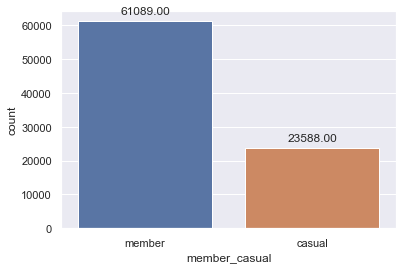

In [66]:
#Visualizing Annual Members Vs Casual Members Countplot
sns.set(style="darkgrid")
splot = sns.countplot(df2["member_casual"])
# For annotation
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [68]:
# Checking rideable types 
df2.rideable_type.value_counts()

docked_bike    84677
Name: rideable_type, dtype: int64

In [90]:
df2.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [111]:
# Top Start Stations with Annual membership holders
df2[df2["member_casual"]=="member"]["start_station_name"].value_counts().head(10)

Clark St & Elm St               604
St. Clair St & Erie St          593
Dearborn St & Erie St           545
Desplaines St & Kinzie St       516
Clark St & Armitage Ave         451
Broadway & Barry Ave            444
Stockton Dr & Wrightwood Ave    420
Wabash Ave & Grand Ave          408
Clark St & Schiller St          406
Columbus Dr & Randolph St       404
Name: start_station_name, dtype: int64

In [115]:
# Top End Stations with Annual membership holders
df2[df2["member_casual"]=="member"]["end_station_name"].value_counts().head(10)

Clark St & Elm St            675
St. Clair St & Erie St       616
Dearborn St & Erie St        587
Broadway & Barry Ave         511
Desplaines St & Kinzie St    508
Wabash Ave & Roosevelt Rd    489
Larrabee St & Webster Ave    446
Wells St & Concord Ln        435
Clark St & Armitage Ave      432
Wabash Ave & Grand Ave       427
Name: end_station_name, dtype: int64

In [112]:
# Top Start Stations with Casual membership holders
# so that we can target marketing in this station more to attract more Annual users
df2[df2["member_casual"]=="casual"]["start_station_name"].value_counts().head(10)

Clark St & Elm St               246
Wabash Ave & Grand Ave          206
Wells St & Huron St             204
Desplaines St & Kinzie St       203
Clark St & Lincoln Ave          198
Wells St & Elm St               195
Sheffield Ave & Waveland Ave    191
Dearborn St & Erie St           185
Ashland Ave & Division St       182
Indiana Ave & Roosevelt Rd      174
Name: start_station_name, dtype: int64

In [114]:
# Top End Stations with Casual membership holders
# so that we can target marketing in this station more to attract more Annual users
df2[df2["member_casual"]=="casual"]["end_station_name"].value_counts().head(10)

Clark St & Elm St               218
Dearborn St & Erie St           198
Wells St & Huron St             183
Stockton Dr & Wrightwood Ave    180
Wabash Ave & Grand Ave          179
Indiana Ave & Roosevelt Rd      178
Ashland Ave & Division St       177
Dearborn Pkwy & Delaware Pl     176
Wells St & Elm St               172
Desplaines St & Kinzie St       170
Name: end_station_name, dtype: int64

In [147]:
#To convert col into datetime format to use datetime's functionalities
# df2["started_at"]=pd.to_datetime(df2["started_at"])
# df2["ended_at"]=pd.to_datetime(df2["ended_at"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84677 entries, 0 to 84775
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             84677 non-null  object        
 1   rideable_type       84677 non-null  object        
 2   started_at          84677 non-null  datetime64[ns]
 3   ended_at            84677 non-null  datetime64[ns]
 4   start_station_name  84677 non-null  object        
 5   start_station_id    84677 non-null  int64         
 6   end_station_name    84677 non-null  object        
 7   end_station_id      84677 non-null  float64       
 8   start_lat           84677 non-null  float64       
 9   start_lng           84677 non-null  float64       
 10  end_lat             84677 non-null  float64       
 11  end_lng             84677 non-null  float64       
 12  member_casual       84677 non-null  object        
dtypes: datetime64[ns](2), float64(5), int64(1), ob

In [ ]:
# import datetime as dt
# df2["date"] = df2["started_at"].apply(lambda x : x.date())

In [155]:
# Checking for missing dates, if any
diff = pd.date_range("2020-04-01","2020-04-30").difference(df2["date"])

In [157]:
# No dates are missing
diff

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [160]:
df2.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,travel_time
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,2020-04-26,00:26:49
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,2020-04-17,00:08:09


In [161]:
# Checking for max travel time taken by a member and that's wrong I suppose lets discover
df2.travel_time.max()

Timedelta('40 days 18:40:02')

In [182]:
# Some started dates are higher than others that's why its showing error
# we will check this out later 
df2[df2["started_at"]>df2["ended_at"]]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,travel_time
2422,7C1E92200AEFF70E,docked_bike,2020-04-27 17:20:30,2020-04-27 17:20:18,St. Clair St & Erie St,211,Clinton St & Washington Blvd,91.0,41.8944,-87.6227,41.8834,-87.6412,member,2020-04-27,-1 days +23:59:48
2504,671BB1F73F4CD303,docked_bike,2020-04-20 16:51:18,2020-04-20 16:51:05,Lake Shore Dr & Belmont Ave,334,Buckingham Fountain,2.0,41.9408,-87.6392,41.8765,-87.6205,casual,2020-04-20,-1 days +23:59:47
3136,502B972C6B1FCAE6,docked_bike,2020-04-12 19:09:54,2020-04-12 19:09:40,Clark St & Schiller St,301,Wells St & Concord Ln,289.0,41.9080,-87.6315,41.9121,-87.6347,member,2020-04-12,-1 days +23:59:46
3542,68E70FDF06F0A439,docked_bike,2020-04-29 17:37:11,2020-04-29 17:37:07,Dearborn St & Adams St,37,California Ave & 23rd Pl,442.0,41.8794,-87.6298,41.8491,-87.6951,member,2020-04-29,-1 days +23:59:56
8212,6EB323BCC83A9D1D,docked_bike,2020-04-05 15:46:12,2020-04-05 15:46:11,Francisco Ave & Foster Ave,471,Damen Ave & Clybourn Ave,163.0,41.9756,-87.7014,41.9319,-87.6779,member,2020-04-05,-1 days +23:59:59
8563,90105A0FA1F2B0F3,docked_bike,2020-04-13 14:06:59,2020-04-13 14:06:45,Racine Ave & Belmont Ave,226,Broadway & Waveland Ave,304.0,41.9397,-87.6589,41.9491,-87.6486,casual,2020-04-13,-1 days +23:59:46
10619,BDFF2212459A9858,docked_bike,2020-04-27 18:51:42,2020-04-27 18:51:14,Sheffield Ave & Wellington Ave,115,Michigan Ave & Washington St,43.0,41.9363,-87.6527,41.8840,-87.6247,member,2020-04-27,-1 days +23:59:32
18827,BFF9D20C42D3B693,docked_bike,2020-04-19 14:10:16,2020-04-19 14:10:03,Desplaines St & Randolph St,96,Halsted St & Dickens Ave,225.0,41.8846,-87.6446,41.9199,-87.6488,casual,2020-04-19,-1 days +23:59:47
19039,15FE83B5CC494A1C,docked_bike,2020-04-19 18:52:35,2020-04-19 18:52:32,Clark St & Armitage Ave,94,Orleans St & Merchandise Mart Plaza,100.0,41.9183,-87.6363,41.8882,-87.6364,member,2020-04-19,-1 days +23:59:57
19806,F6FDF112F975A216,docked_bike,2020-04-28 15:35:24,2020-04-28 15:35:11,St. Clair St & Erie St,211,Fairbanks Ct & Grand Ave,24.0,41.8944,-87.6227,41.8918,-87.6206,member,2020-04-28,-1 days +23:59:47


In [196]:
# Creating new feature  from dates col to know day of the week
df2["Day_of_week"]=df2["started_at"].apply(lambda x : x.dayofweek)

<ipython-input-196-c1903a0d6d92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Day_of_week"]=df2["started_at"].apply(lambda x : x.dayofweek)


In [201]:
# Mapping numbers to day of week
df2["Day_of_week"]=df2["Day_of_week"].map({0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"})

<ipython-input-201-043bcad21871>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Day_of_week"]=df2["Day_of_week"].map({0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"})


In [236]:
# Checking changes
df2.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,travel_time,Day_of_week
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,2020-04-26,00:26:49,Sunday
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,2020-04-17,00:08:09,Friday


In [217]:
# Checking most number of rides vs day of week for both type of customers
df2.groupby(["member_casual","Day_of_week"]).count()["ride_id"].sort_values()

member_casual  Day_of_week
casual         Wednesday       1794
               Thursday        2426
               Friday          2507
               Monday          2677
               Tuesday         3651
               Saturday        4065
               Sunday          6468
member         Wednesday       6916
               Friday          7454
               Monday          8055
               Saturday        8833
               Tuesday         9146
               Thursday        9256
               Sunday         11429
Name: ride_id, dtype: int64

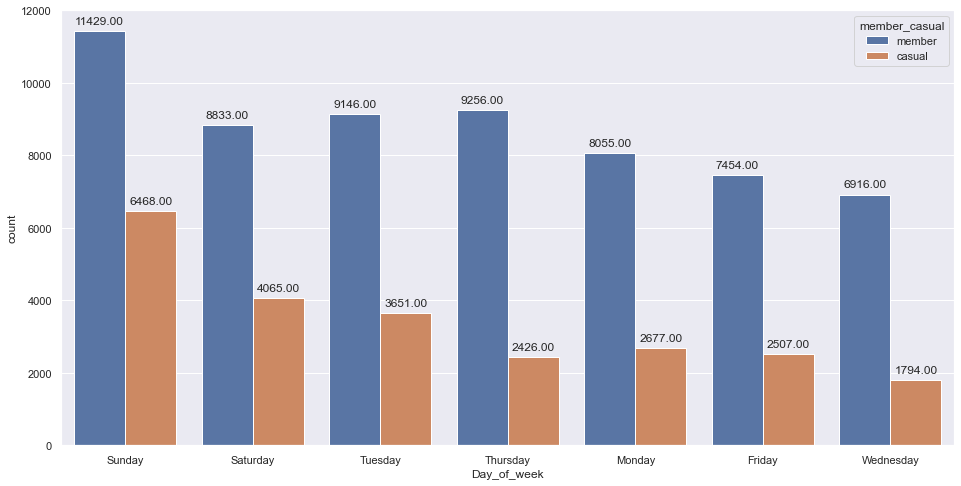

In [216]:
#Visuals no. of rides vs day of weeks
plt.figure(figsize=(16,8))
sns.set(style="darkgrid")
splot2 = sns.countplot(df2["Day_of_week"],order=df2["Day_of_week"].value_counts().index,hue=df2["member_casual"])
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [234]:
# Coverting latitudes and longitudes to distance
from math import sin, cos, sqrt, atan2, radians

dfrange = df2.shape[0]
dist=[]
R=6373.0
for i in range(0,int(dfrange)):
    lat1 = radians(df2["start_lat"].iloc[i])
    lon1 = radians(df2["start_lng"].iloc[i])
    lat2 = radians(df2["end_lat"].iloc[i])
    lon2 = radians(df2["end_lng"].iloc[i])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    d=R*c
    dist.append(format(d,".2f"))


In [237]:
# New feature
df2["travel_distance"]=dist

<ipython-input-237-a10d3c19ee2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["travel_distance"]=dist


In [238]:
df2

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,travel_time,Day_of_week,travel_distance
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,2020-04-26,00:26:49,Sunday,3.99
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,2020-04-17,00:08:09,Friday,0.98
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,2020-04-01,00:14:23,Wednesday,2.99
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,2020-04-07,00:12:12,Tuesday,2.14
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,2020-04-18,00:52:55,Saturday,9.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84771,200E9CDFC5685AA0,docked_bike,2020-04-16 16:10:16,2020-04-16 16:23:11,Dearborn Pkwy & Delaware Pl,140,Dearborn Pkwy & Delaware Pl,140.0,41.8990,-87.6299,41.8990,-87.6299,member,2020-04-16,00:12:55,Thursday,0.00
84772,F58A8F2ABCB5D95B,docked_bike,2020-04-30 17:56:12,2020-04-30 18:15:21,Kimbark Ave & 53rd St,322,Cottage Grove Ave & 51st St,351.0,41.7996,-87.5947,41.8030,-87.6066,casual,2020-04-30,00:19:09,Thursday,1.06
84773,A3754693A80E4913,docked_bike,2020-04-24 19:57:33,2020-04-24 21:50:43,Sedgwick St & Schiller St,236,Wells St & Elm St,182.0,41.9076,-87.6386,41.9032,-87.6343,casual,2020-04-24,01:53:10,Friday,0.61
84774,D610CABB67F7B744,docked_bike,2020-04-02 17:59:55,2020-04-02 18:42:26,Damen Ave & Charleston St,310,Damen Ave & Charleston St,310.0,41.9201,-87.6779,41.9201,-87.6779,casual,2020-04-02,00:42:31,Thursday,0.00


In [241]:
# Coming back to issue of start date and end dates, and doing swap 
li=[]
end=[]
dfrange = df2.shape[0]
for i in range(0,int(dfrange)):
    if df2["started_at"].iloc[i]>df2["ended_at"].iloc[i]:
        li.append(df2["ended_at"].iloc[i])
        end.append(df2["started_at"].iloc[i])
    else:
        li.append(df2["started_at"].iloc[i])
        end.append(df2["ended_at"].iloc[i])
    

In [243]:
# Assigning new cols
df2["new_start_time"]=li
df2["new_end_time"]=end

<ipython-input-243-51079bf940a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["new_start_time"]=li
<ipython-input-243-51079bf940a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["new_end_time"]=end


In [245]:
# Checking dataset
df2.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,travel_time,Day_of_week,travel_distance,new_start_time,new_end_time
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,2020-04-26,00:26:49,Sunday,3.99,2020-04-26 17:45:14,2020-04-26 18:12:03
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,2020-04-17,00:08:09,Friday,0.98,2020-04-17 17:08:54,2020-04-17 17:17:03
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,2020-04-01,00:14:23,Wednesday,2.99,2020-04-01 17:54:13,2020-04-01 18:08:36
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,2020-04-07,00:12:12,Tuesday,2.14,2020-04-07 12:50:19,2020-04-07 13:02:31
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,2020-04-18,00:52:55,Saturday,9.13,2020-04-18 10:22:59,2020-04-18 11:15:54


In [246]:
# Taking into consider and updating column to remove errors
df2["travel_time"]=df2["new_end_time"]-df2["new_start_time"]

<ipython-input-246-b82f0838dffd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["travel_time"]=df2["new_end_time"]-df2["new_start_time"]


In [256]:
# Checking
df2[df2["new_start_time"]>df2["new_end_time"]]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,travel_time,Day_of_week,travel_distance,new_start_time,new_end_time


In [268]:
# Checking max travel distance
df2["travel_distance"].max()

'9.99'

In [272]:
# Distance col to float rather than object
df2["travel_distance"]=df2["travel_distance"].map(float)

<ipython-input-272-655d93aac973>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["travel_distance"]=df2["travel_distance"].map(float)


In [274]:
# Checking avg travel distance per member vs casual 
df2.groupby("member_casual").mean()["travel_distance"]

member_casual
casual    1.983820
member    2.163067
Name: travel_distance, dtype: float64

In [299]:
# Checking distance vs day of week
df2.groupby(["member_casual","Day_of_week"]).mean()["travel_distance"]

member_casual  Day_of_week
casual         Friday         2.113849
               Monday         1.907482
               Saturday       2.162868
               Sunday         1.982200
               Thursday       2.008965
               Tuesday        1.772545
               Wednesday      1.912129
member         Friday         2.140551
               Monday         2.124828
               Saturday       2.228528
               Sunday         2.323138
               Thursday       2.065403
               Tuesday        2.127234
               Wednesday      2.061832
Name: travel_distance, dtype: float64

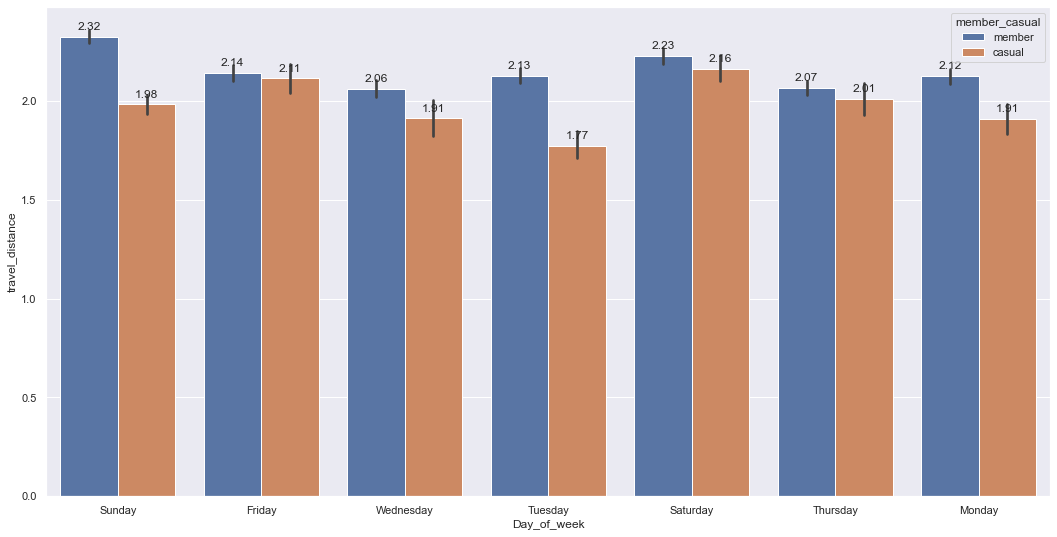

In [294]:
plt.figure(figsize=(18,9))
splot3=sns.barplot(df2["Day_of_week"],df2["travel_distance"], hue=df2["member_casual"])
for p in splot3.patches:
    splot3.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [300]:
df2.to_csv("Updated_Dataset.csv")

### Conclusion

**In this Case Study**

* We first imported required libraries like numpy,pandas,matplotlib,seaborn,etc
* Then we cleaned Dataset and analyzed by 
1. Dropping null values as they were small in numbers 
2. Swapped start date and end date for rows with start date more than end date
3. Checked for duplicates and missing dates
4. Creted new day of week column, extracted date and travel time by subtracting start and end date
5. With latitudes and longitudes we found distance by using formula
6. Analyzed top 10 stations for start and end points
7. Analyzed same with respect to member categories
8. Found that for casual rider Sunday and Saturday, and for annual member Sunday and Thursday are peak days
9. And analyzed various other relations like distance and avg distance w.r.t.o. members and dates/dayofweeks
10. Visualized some and rest visuals can be seen on my Tableau Public profile below

###### Tableau Public Profile :  <https://public.tableau.com/app/profile/harpreet.singh6784>





**Thanks!!!**